<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/Ch_06_%EC%B0%A8%EC%9B%90%EC%9D%98_%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6. 차원의 축소

## 6.0 내적
### 코사인 유사성(Cosine Similarity)

<img src = 'https://substackcdn.com/image/fetch/w_1456,c_limit,f_webp,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F9b7020f2-925d-4d5c-8ea2-83b461f68fae_1483x1000.png' width=600 height=400>


### **Norm은 원점(0,0)으로 부터 L2 거리(유클리디언 거리)**

$$
\|a\| = \sqrt{3^2 + 4^2} = \sqrt{9 + 16} = \sqrt{25} = 5
$$



In [ ]:
import numpy as np

# 두 벡터 정의
vector_a = np.array([3, 4])  # 벡터 a
vector_b = np.array([6, 8])  # 벡터 b

# 두 벡터의 내적 계산
dot_product = np.dot(vector_a, vector_b)

# 벡터 크기(노름) 계산
magnitude_a = np.linalg.norm(vector_a)
magnitude_b = np.linalg.norm(vector_b)

# 코사인 유사성 계산
cosine_similarity = dot_product / (magnitude_a * magnitude_b)

# 결과 출력
print(f"벡터 a: {vector_a}")
print(f"벡터 b: {vector_b}")
print(f"두 벡터의 내적: {dot_product}")
print(f"벡터 a의 크기: {magnitude_a}")
print(f"벡터 b의 크기: {magnitude_b}")
print(f"코사인 유사성: {cosine_similarity}")

벡터 a: [3 4]
벡터 b: [6 8]
두 벡터의 내적: 50
벡터 a의 크기: 5.0
벡터 b의 크기: 10.0
코사인 유사성: 1.0


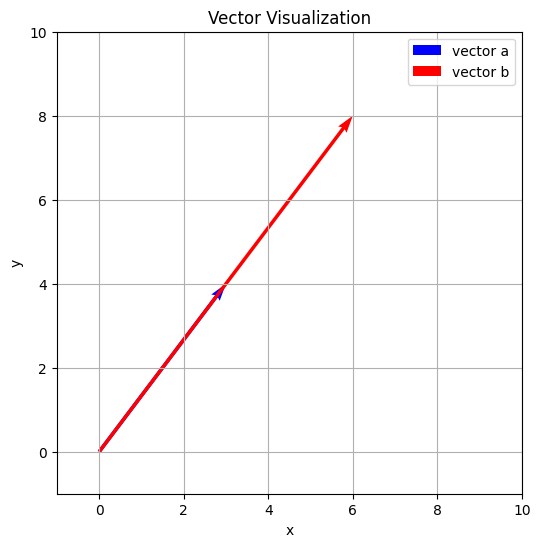

In [ ]:
# prompt: 시각화해줘

import matplotlib.pyplot as plt

# 벡터 시각화
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, vector_a[0], vector_a[1], angles='xy', scale_units='xy', scale=1, color='blue', label='vector a')
plt.quiver(0, 0, vector_b[0], vector_b[1], angles='xy', scale_units='xy', scale=1, color='red', label='vector b')

# 축 설정
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Vector Visualization')
plt.grid(True)
plt.legend()

# 플롯 표시
plt.show()


### 내적의 한 종류는 가중평균치

In [ ]:
# 0부터 100까지의 정수에서 10 by 3 행렬을 생성
matrix_10x3 = np.random.randint(50, 101, size=(5, 3))
print(matrix_10x3_int)
# 3 by 1 행렬 정의
matrix_3x1 = np.array([1/3, 1/3, 1/3])  # 동일 비중의 가중평균치
print(matrix_3x1)
# 두 행렬의 내적 계산
dot_product = np.dot(matrix_10x3, matrix_3x1)
dot_product

[[50 61 72]
 [89 58 74]
 [75 85 71]
 [87 96 98]
 [66 69 89]]
[0.33333333 0.33333333 0.33333333]


array([84.66666667, 68.33333333, 71.33333333, 89.33333333, 76.33333333])

### **벡터에 행렬을 내적하면 같은 차원 혹은 다른 차원으로 좌표이동하게 된다**

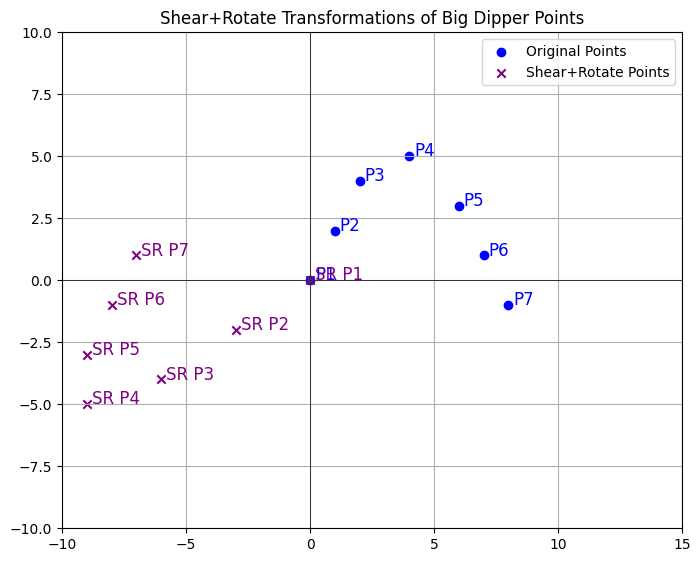

In [ ]:
# 북두칠성 모양을 대략적으로 나타내는 7개의 임의의 점 정의
big_dipper_points = np.array([
    [0, 0],   # Alkaid
    [1, 2],   # Mizar
    [2, 4],   # Alioth
    [4, 5],   # Megrez
    [6, 3],   # Phecda
    [7, 1],   # Dubhe
    [8, -1]   # Merak
])

# Shear 행렬 생성 (x축 기준)
shear_matrix = np.array([[1, 1], [0, 1]])

# Shear + Rotate 행렬 생성 (x축으로 shear 후 45도 회전)
theta = np.pi / 1  # 180도
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])
shear_rotate_matrix = np.dot(rotation_matrix, shear_matrix)

# Shear + Rotate 변환 적용
shear_rotate_dipper_points = np.dot(big_dipper_points, shear_rotate_matrix.T)

# 원래 점과 변환된 점들을 시각화
plt.figure(figsize=(8, 8))

# 원래 점들 (북두칠성 모양)
plt.scatter(big_dipper_points[:, 0], big_dipper_points[:, 1], color='blue', label='Original Points')
for i, point in enumerate(big_dipper_points):
    plt.text(point[0] + 0.2, point[1], f'P{i+1}', fontsize=12, color='blue')

# Shear + Rotate 변환된 점들
plt.scatter(shear_rotate_dipper_points[:, 0], shear_rotate_dipper_points[:, 1], color='purple', label='Shear+Rotate Points', marker='x')
for i, point in enumerate(shear_rotate_dipper_points):
    plt.text(point[0] + 0.2, point[1], f'SR P{i+1}', fontsize=12, color='purple')

# 설정
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim(-10, 15)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title('Shear+Rotate Transformations of Big Dipper Points')
plt.grid(True)

# 그래프 출력
plt.show()


<img src= "https://algebra1course.wordpress.com/wp-content/uploads/2013/02/slide10.jpg" width = 500>

## **Kernel Transformation**

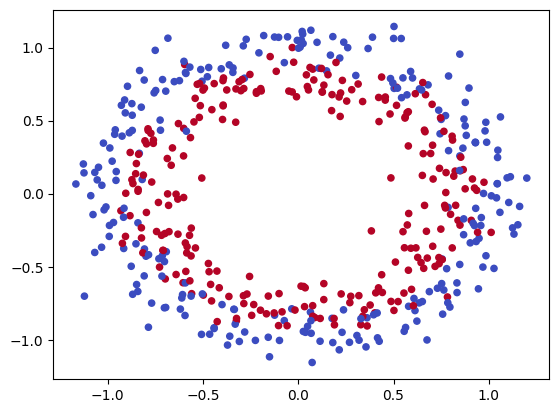

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=500, random_state=11, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='coolwarm');

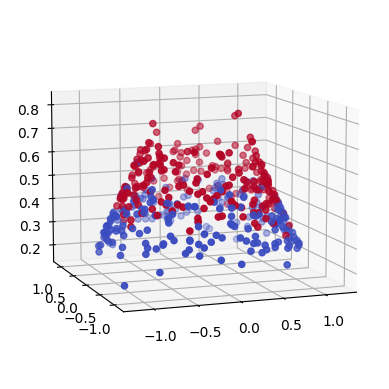

In [ ]:
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, cmap='coolwarm')
ax.view_init(10, 250)


## **단순회귀분석, 다중회귀분석, 인공신경망의 이해**

## **내적(Inner Product)**

In [ ]:
!pip install mglearn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 14.4 MB/s eta 0:00:00


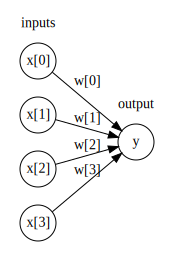

In [ ]:
import mglearn

mglearn.plot_nn_graphs.plot_logistic_regression_graph()

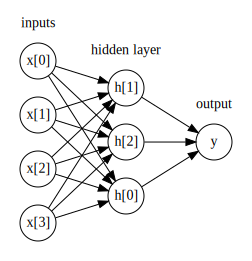

In [ ]:
mglearn.plot_nn_graphs.plot_single_hidden_layer_graph()

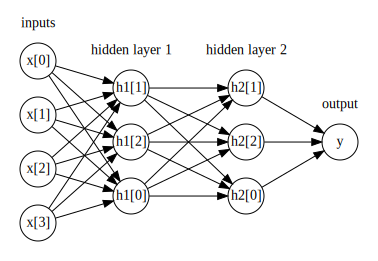

In [ ]:
mglearn.plot_nn_graphs.plot_two_hidden_layer_graph()

## **단순회귀분석**
<img src="https://velog.velcdn.com/images/shwjd1017/post/33909554-c587-480b-9672-62c978a3dd16/image.jpeg">



## 6.1 차원의 저주와 차원 축소의 이유
<img src ='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbhyHmS%2FbtqE6kfvY7U%2FmDNqAXtP38Ix6Q5jLExvcK%2Fimg.png'>


## 6.2 PCA를 이용한 차원 축소
### **[Eigenvalues and eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors)**
### [chatGPT 설명](https://chatgpt.com/share/6703a379-033c-800f-8aa3-1222c986c22d)

In [ ]:
from sklearn.datasets import fetch_20newsgroups

#20개의 토픽 중 선택하고자 하는 토픽을 리스트로 생성
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

#학습 데이터셋을 가져옴
newsgroups_train = fetch_20newsgroups(subset='train',
#메일 내용에서 hint가 되는 부분을 삭제 - 순수하게 내용만으로 분류
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
#검증 데이터셋을 가져옴
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

X_train = newsgroups_train.data   #학습 데이터셋 문서
y_train = newsgroups_train.target #학습 데이터셋 라벨

X_test = newsgroups_test.data     #검증 데이터셋 문서
y_test = newsgroups_test.target   #검증 데이터셋 라벨

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")

from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

RegTok = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english')) #영어 불용어를 가져옴

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower()) #이렇게 해도 되는지 확인
    # stopwords 제외
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    # portr stemmer 적용
    features = (list(map(lambda token: PorterStemmer().stem(token),words)))
    return features

tfidf = TfidfVectorizer(tokenizer=tokenizer)
X_train_tfidf = tfidf.fit_transform(X_train) # train set을 변환
X_test_tfidf = tfidf.transform(X_test) # test set을 변환

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression() #분류기 선언
LR_clf.fit(X_train_tfidf, y_train) # train data를 이용하여 분류기를 학습
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_tfidf, y_test)))

#Train set score: 0.962
#Test set score: 0.761


1: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2000, random_state=7)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

print('Original tfidf matrix shape:', X_train_tfidf.shape)
print('PCA Converted matrix shape:', X_train_pca.shape)
print('Sum of explained variance ratio: {:.3f}'.format(pca.explained_variance_ratio_.sum()))

Original tfidf matrix shape: (2034, 20085)
PCA Converted matrix shape: (2034, 2000)
Sum of explained variance ratio: 1.000


In [ ]:
LR_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test)))

#Train set score: 0.962
#Test set score: 0.761


In [ ]:
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=1)
lasso_clf.fit(X_train_tfidf, y_train)

print('#Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf, y_test)))

import numpy as np
# 계수(coefficient) 중에서 0이 아닌 것들의 개수를 출력
print('#Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train_tfidf.shape[1])

#Train set score: 0.790
#Test set score: 0.718
#Used features count: 321 out of 20085


In [ ]:
pca = PCA(n_components=321, random_state=7)

X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())
print('PCA Converted X shape:', X_train_pca.shape)
print('Sum of explained variance ratio: {:.3f}'.format(pca.explained_variance_ratio_.sum()))

LR_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test)))

PCA Converted X shape: (2034, 321)
Sum of explained variance ratio: 0.437
#Train set score: 0.875
#Test set score: 0.751


In [ ]:
pca = PCA(n_components=100, random_state=7)

X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())
print('PCA Converted X shape:', X_train_pca.shape)
print('Sum of explained variance ratio: {:.3f}'.format(pca.explained_variance_ratio_.sum()))

LR_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test)))

PCA Converted X shape: (2034, 100)
Sum of explained variance ratio: 0.211
#Train set score: 0.807
#Test set score: 0.738


## 6.3 LSA를 이용한 차원 축소와 의미 파악


### 6.3.1 LSA를 이용한 차원 축소와 성능


In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2000, random_state=7) #압축할 component의 수 지정
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print('LSA Converted X shape:', X_train_lsa.shape)
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

LR_clf.fit(X_train_lsa, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_lsa, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_lsa, y_test)))

LSA Converted X shape: (2034, 2000)
Sum of explained variance ratio: 1.000
#Train set score: 0.962
#Test set score: 0.761


In [ ]:
svd = TruncatedSVD(n_components=100, random_state=1) #압축할 component의 수 지정
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print('LSA Converted X shape:', X_train_lsa.shape)
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

LR_clf.fit(X_train_lsa, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_lsa, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_lsa, y_test)))

LSA Converted X shape: (2034, 100)
Sum of explained variance ratio: 0.209
#Train set score: 0.810
#Test set score: 0.745


### 6.3.2 LSA를 이용한 의미 기반의 문서 간 유사도 계산


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print('#사용된 전체 카테고리:', newsgroups_train.target_names)
print('#첫 문서의 카테고리:', y_train[0])

#변환된 count vector와 기존 값들과의 similarity 계산
sim_result = cosine_similarity([X_train_lsa[0]], X_train_lsa)

print("#Top 20 유사도(lsa):\n", sorted(sim_result[0].round(2), reverse=True)[:20])
sim_index = (-sim_result[0]).argsort()[:20]
print('#Top 20 유사 뉴스의 인덱스(lsa):\n', sim_index)
sim_labels = [y_train[i] for i in sim_index]
print('#Top 20 유사 뉴스의 카테고리(lsa):\n', sim_labels)

#사용된 전체 카테고리: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
#첫 문서의 카테고리: 1
#Top 20 유사도(lsa):
 [1.0, 0.74, 0.74, 0.72, 0.7, 0.7, 0.69, 0.67, 0.66, 0.65, 0.65, 0.65, 0.63, 0.62, 0.62, 0.62, 0.57, 0.57, 0.55, 0.54]
#Top 20 유사 뉴스의 인덱스(lsa):
 [   0 1957 1674  501 1995 1490  790 1902 1575 1209 1728  892 1892  998
 1038 1826 1290 1089  867  151]
#Top 20 유사 뉴스의 카테고리(lsa):
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
sim_result = cosine_similarity(X_train_tfidf[0], X_train_tfidf)

print("#Top 20 유사도(tfidf):\n", sorted(sim_result[0].round(2), reverse=True)[:20])
sim_index = (-sim_result[0]).argsort()[:20]
print('#Top 20 유사 뉴스의 인덱스(tfidf):\n', sim_index)
sim_labels = [y_train[i] for i in sim_index]
print('#Top 20 유사 뉴스의 카테고리(tfidf):\n', sim_labels)

#Top 20 유사도(tfidf):
 [1.0, 0.3, 0.22, 0.21, 0.19, 0.19, 0.19, 0.17, 0.16, 0.16, 0.16, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.14]
#Top 20 유사 뉴스의 인덱스(tfidf):
 [   0 1575 1892 1490  501 1290 1013  998 1636 1705 1995 1957 1664  651
 1038  429 1089 1209 1728 1803]
#Top 20 유사 뉴스의 카테고리(tfidf):
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### 6.3.3 잠재된 토픽의 분석


In [ ]:
svd = TruncatedSVD(n_components=10, random_state=1) #압축할 component의 수 지정
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print('LSA Converted X shape:', X_train_lsa.shape)
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

terms = tfidf.get_feature_names_out()
def get_topics(model, feature_names, n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx+1),
              [feature_names[i] for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd, terms)

LSA Converted X shape: (2034, 10)
Sum of explained variance ratio: 0.045
Topic 1: ['would', 'one', 'god', 'think', 'use', 'peopl', 'know', 'like', 'say', 'space']
Topic 2: ['file', 'imag', 'thank', 'program', 'graphic', 'space', 'format', 'use', 'color', 'ftp']
Topic 3: ['space', 'orbit', 'nasa', 'launch', 'shuttl', 'satellit', 'year', 'moon', 'lunar', 'cost']
Topic 4: ['moral', 'object', 'system', 'valu', 'goal', 'think', 'anim', 'absolut', 'natur', 'defin']
Topic 5: ['ico', 'bobb', 'tek', 'beauchain', 'bronx', 'manhattan', 'sank', 'queen', 'vice', 'blew']
Topic 6: ['god', 'file', 'imag', 'object', 'moral', 'exist', 'space', 'format', 'system', 'color']
Topic 7: ['file', 'islam', 'imag', 'cview', 'use', 'format', 'color', 'muslim', 'religion', 'peopl']
Topic 8: ['post', 'file', 'space', 'islam', 'read', 'cview', 'format', 'articl', 'group', 'moral']
Topic 9: ['christian', 'graphic', 'imag', 'jesu', 'book', 'data', 'group', 'softwar', 'law', 'code']
Topic 10: ['exist', 'atheism', 'athe

### 6.3.4 단어 간 의미 유사도 분석


In [ ]:
tfidf = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.5)
X_train_tfidf = tfidf.fit_transform(X_train) # train set을 변환

svd = TruncatedSVD(n_components=100, random_state=1) #압축할 component의 수 지정
X_train_lsa = svd.fit_transform(X_train_tfidf)

print('#components_의 shape:', svd.components_.shape)
print('#singular_values_의 shape:', svd.singular_values_.shape)
t_words = np.diag(svd.singular_values_).dot(svd.components_).T
print('#변환된 단어-잠재의미 행렬의 shape:', t_words.shape)

# space에 해당하는 벡터를 가져옴
source = t_words[np.where(tfidf.get_feature_names_out() == 'space')[0][0]]

sim_result = cosine_similarity([source], t_words) #변환된 count vector와 기존 값들과의 similarity 계산

print("#Top 20 유사도(tfidf):", sorted(sim_result[0].round(2), reverse=True)[:20])
sim_index = (-sim_result[0]).argsort()[:20]
print('#Top 20 유사 뉴스의 인덱스(tfidf):', sim_index)
sim_labels = [tfidf.get_feature_names_out()[i] for i in sim_index]
print('#Top 20 유사 뉴스의 카테고리(tfidf):', sim_labels)

#components_의 shape: (100, 1000)
#singular_values_의 shape: (100,)
#변환된 단어-잠재의미 행렬의 shape: (1000, 100)
#Top 20 유사도(tfidf): [1.0, 0.73, 0.72, 0.69, 0.66, 0.58, 0.56, 0.56, 0.54, 0.54, 0.52, 0.52, 0.52, 0.51, 0.51, 0.5, 0.5, 0.49, 0.48, 0.47]
#Top 20 유사 뉴스의 인덱스(tfidf): [812 314 754 829 594 679 720 650 785 565 101 435 606 545 854 746 669 856
 611 564]
#Top 20 유사 뉴스의 카테고리(tfidf): ['space', 'exploration', 'sci', 'station', 'office', 'propulsion', 'reports', 'planetary', 'shuttle', 'national', 'astro', 'international', 'operations', 'missions', 'technical', 'satellites', 'probes', 'telescope', 'orbiter', 'nasa']


## 6.3 tSNE를 이용한 시각화와 차원축소의 효과


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

 https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

c:\users\parksangun\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\parksangun\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


TSNE dimension: (2034, 2)


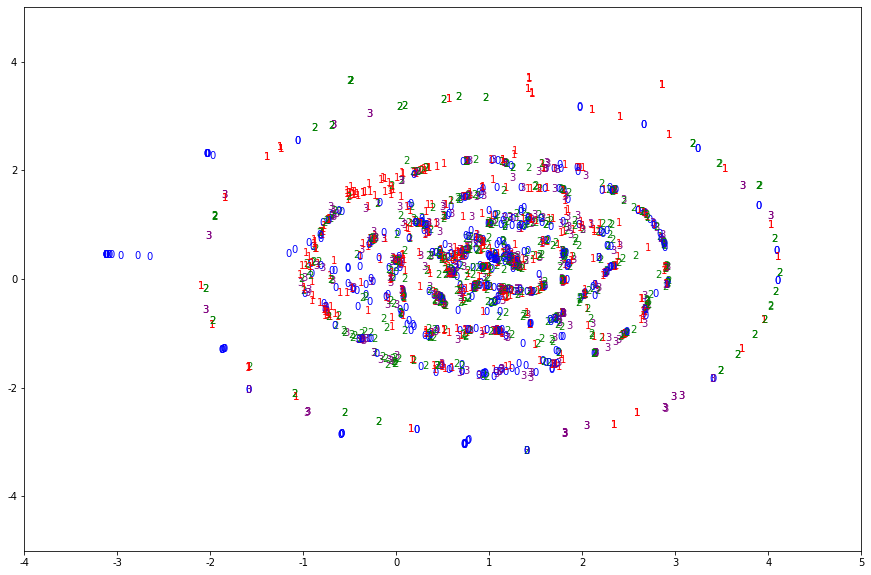

In [ ]:
from sklearn.manifold import TSNE

tfidf = TfidfVectorizer(tokenizer=tokenizer)
X_train_tfidf = tfidf.fit_transform(X_train) # train set을 변환
X_test_tfidf = tfidf.transform(X_test) # test set을 변환

tsne = TSNE(n_components=2, random_state=7)
tsne_tfidf = tsne.fit_transform(X_train_tfidf)
print('TSNE dimension:', tsne_tfidf.shape)

def tsne_graph(tsne_2, label, lim=None):
    colors = {0:'blue', 1:'red', 2:'green', 3:'purple'}
    x = tsne_2[:,0] #압축된 첫 차원을 x축으로 이용
    y = tsne_2[:,1] #압축된 둘째 차원은 y축으로 이용
    plt.figure(figsize=(15,10))
    if lim == None:
        lim = [min(x), max(x), min(y), max(y)]
    plt.xlim(lim[0], lim[1])
    plt.ylim(lim[2], lim[3])
    #for i in range(500):
    for i in range(len(x)):
        #각 값에 대해 y값 즉 label에 따라 색을 바꿔가며 text로 그래프에 출력
        if (lim[0] < x[i] < lim[1]) and (lim[2] < y[i] < lim[3]):
            plt.text(x[i], y[i], label[i], color = colors[label[i]])
    plt.show()

tsne_graph(tsne_tfidf, y_train, (-4, 5, -5, 5))

LSA Converted X shape: (2034, 100)
Sum of explained variance ratio: 0.209
TSNE dimension: (2034, 2)
#Selected categories: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


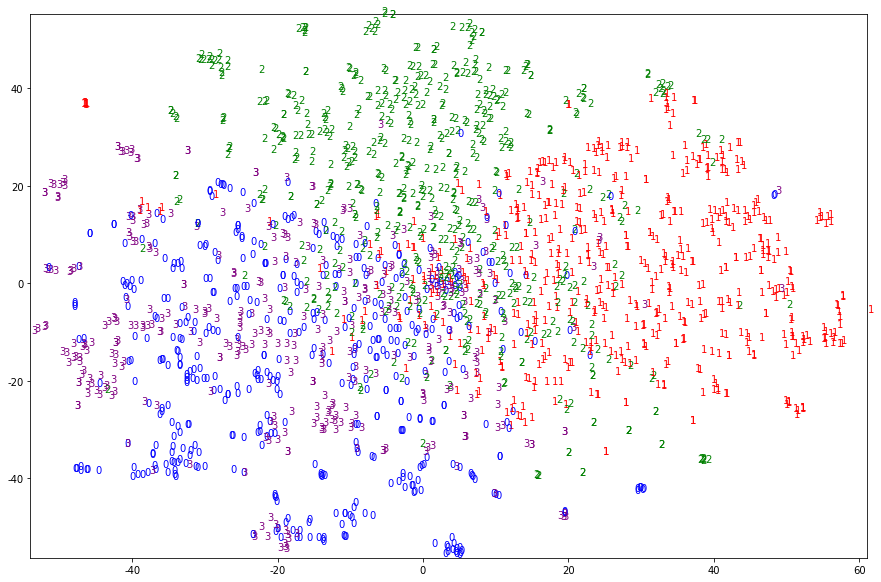

In [ ]:
svd = TruncatedSVD(n_components=100, random_state=1) #압축할 component의 수 지정
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print('LSA Converted X shape:', X_train_lsa.shape)
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

tsne_lsa = tsne.fit_transform(X_train_lsa)
print('TSNE dimension:', tsne_lsa.shape)
print('#Selected categories:', newsgroups_train.target_names)

tsne_graph(tsne_lsa, y_train)